# Overview

## What to Predict

- Stage 1 - You should submit predicted probabilities for every possible matchup in the past 5 NCAA® tournaments (seasons 2015-2019).
- Stage 2 - You should submit predicted probabilities for every possible matchup before the 2020 tournament begins.

Refer to the [Timeline page](https://www.kaggle.com/c/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/overview/timeline) for specific dates. In both stages, the sample submission will tell you which games to predict.

# Import Packages

In [1]:
import os

########################################## basic packages

import pandas as pd
import numpy as np

########################################## plotting packages

# matplotlib
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

# Bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral6, Spectral10


########################################## utility

# To print multiple output in a single cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

########################################## Dimension Reduction
import umap


########################################## Modeling

# Train Test Split
from sklearn.model_selection import train_test_split

# Scaler
from sklearn.preprocessing import MinMaxScaler

# Sklearn
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



#from tsfresh.feature_extraction import feature_calculators as fc

In [2]:
# Keras
from keras.models import load_model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Embedding, Masking, Conv1D, MaxPooling1D, Flatten, TimeDistributed, Conv2D, SimpleRNN
from keras.optimizers import Adam
from keras.utils import Sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


Using TensorFlow backend.


# Data Download

# Data Import

In [3]:
def get_file_list(datapath):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(datapath)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(datapath, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + get_file_list(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [5]:
main_path = 'F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\'

sub_folders = os.listdir(main_path)
path1 = main_path + sub_folders[0] + '\\'
path2 = main_path + sub_folders[1] + '\\'
path3 = main_path + sub_folders[2] + '\\'

saving_path = main_path + sub_folders[0] + '\\'


# Get the list of all files in directory tree at given path
data_list1 = get_file_list(path1)
data_list2 = get_file_list(path2)
data_list3 = get_file_list(path3)


data_list1
data_list2
data_list3

['F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\1Stage2DataFiles\\Cities.csv',
 'F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\1Stage2DataFiles\\Conferences.csv',
 'F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\1Stage2DataFiles\\ConferenceTourneyGames.csv',
 'F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\1Stage2DataFiles\\GameCities.csv',
 'F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\1Stage2DataFiles\\NCAATourneyCompactResults.csv',
 'F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\1Stage2DataFiles\\NCAATourneyDetailedResults.csv',
 'F:\\

['F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\DataFiles\\Cities.csv',
 'F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\DataFiles\\Conferences.csv',
 'F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\DataFiles\\ConferenceTourneyGames.csv',
 'F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\DataFiles\\GameCities.csv',
 'F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\DataFiles\\NCAATourneyCompactResults.csv',
 'F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\DataFiles\\NCAATourneyDetailedResults.csv',
 'F:\\OneDrive - Georgia State University\\Data 

['F:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2019-NCAAM\\MasseyOrdinals\\MasseyOrdinals.csv']

In [ ]:
tourney_compact_result_M = pd.read_csv(path1 + 'NCAATourneyCompactResults.csv')
tourney_detailed_result_M = pd.read_csv(path1 + 'NCAATourneyDetailedResults.csv')

tourney_seed_M = pd.read_csv(path1 + 'NCAATourneySeeds.csv')

regular_compact_result_M = pd.read_csv(path1 + 'RegularSeasonCompactResults.csv')
regular_detailed_result_M = pd.read_csv(path1 + 'RegularSeasonDetailedResults.csv')

season_M = pd.read_csv(path1 + 'Seasons.csv')
teams_M = pd.read_csv(path1 + 'Teams.csv')

submission_file = pd.read_csv(path1 + 'SampleSubmissionStage2.csv')

cities_game_M = pd.read_csv(path1 + 'GameCities.csv')
cities = pd.read_csv(path1 + 'Cities.csv')

# Data Preparation

## WTeam and LTeam ----> Team and Opp_Team and Result 

for both tourney_compact_result and regular_detailed_result

### Tourney_Compact_Result

In [ ]:
# create a column indicating that the data is from regular seasons or tournaments.
tourney_compact_result_M['CRType'] = "NCAA"

tourney_winners = tourney_compact_result_M.copy()
tourney_winners['Result'] = 1
tourney_winners = tourney_winners.rename(columns={"WTeamID": "TeamID", "LTeamID": "Opp_TeamID", "WScore": "Score", "LScore": "Opp_Score", "WLoc":"Loc"})
len(tourney_winners)

tourney_losers = tourney_compact_result_M.copy()
tourney_losers['Result'] = 0
tourney_losers = tourney_losers.rename(columns={"LTeamID": "TeamID", "WTeamID": "Opp_TeamID", "LScore": "Score", "WScore": "Opp_Score", "WLoc":"Loc"})



len(tourney_losers)


tourney_compact_result_M = pd.concat([tourney_winners, tourney_losers])
tourney_compact_result_M

### Regular_Detailed_Result

In [ ]:
# create a column indicating that the data is from regular seasons.
regular_detailed_result_M['CRType'] = "Regular"

regular_winners = regular_detailed_result_M.copy()
regular_winners['Result'] = 1
regular_winners = regular_winners.rename(columns={'WTeamID':'TeamID', 'WScore':'Score', 'LTeamID':'Opp_TeamID', 'LScore':'Opp_Score', 'WLoc':'Loc', 'WFGM':'FGM', 
                                                  'WFGA':'FGA', 'WFGM3':'FGM3', 'WFGA3':'FGA3', 'WFTM':'FTM', 'WFTA':'FTA', 'WOR':'OR', 
                                                  'WDR':'DR', 'WAst':'Ast', 'WTO':'TO', 'WStl':'Stl', 'WBlk':'Blk', 'WPF':'PF', 'LFGM': 'Opp_FGM', 
                                                  'LFGA': 'Opp_FGA', 'LFGM3':'Opp_FGM3', 'LFGA3':'Opp_FGA3', 'LFTM':'Opp_FTM', 'LFTA':'Opp_FTA', 
                                                  'LOR':'Opp_OR', 'LDR':'Opp_DR', 'LAst':'Opp_Ast', 'LTO':'Opp_TO', 'LStl': 'Opp_Stl', 
                                                  'LBlk':'Opp_Blk', 'LPF':'Opp_PF'
                                               })
    
len(regular_winners)





regular_losers = regular_detailed_result_M.copy()
regular_losers['Result'] = 0
regular_losers = regular_losers.rename(columns={'LTeamID':'TeamID', 'LScore':'Score', 'WTeamID':'Opp_TeamID', 'WScore':'Opp_Score', 'WLoc':'Loc', 'LFGM':'FGM', 
                                                  'LFGA':'FGA', 'LFGM3':'FGM3', 'LFGA3':'FGA3', 'LFTM':'FTM', 'LFTA':'FTA', 'LOR':'OR', 
                                                  'LDR':'DR', 'LAst':'Ast', 'LTO':'TO', 'LStl':'Stl', 'LBlk':'Blk', 'LPF':'PF', 'WFGM': 'Opp_FGM', 
                                                  'WFGA': 'Opp_FGA', 'WFGM3':'Opp_FGM3', 'WFGA3':'Opp_FGA3', 'WFTM':'Opp_FTM', 'WFTA':'Opp_FTA', 
                                                  'WOR':'Opp_OR', 'WDR':'Opp_DR', 'WAst':'Opp_Ast', 'WTO':'Opp_TO', 'WStl': 'Opp_Stl', 
                                                  'WBlk':'Opp_Blk', 'WPF':'Opp_PF'
                                               })
len(regular_losers)


regular_detailed_result_M = pd.concat([regular_winners, regular_losers])
regular_detailed_result_M

## Get the Team Season Data from the Regular_Detailed_Result table

In [ ]:
tourney_compact_result_M.columns
regular_detailed_result_M.columns

### Total Results during season

#### Stats for the games won

In [ ]:
# Get the Total Results per team per seaon from the regular season data
winning_stats = regular_detailed_result_M[regular_detailed_result_M['Result'] == 1]
winning_stats.drop(['Loc', 'CRType'], axis = 1, inplace=True)

# Sum
winning_stats_total = winning_stats.groupby(['Season', 'TeamID']).sum()
winning_stats_total = winning_stats_total.drop(['DayNum', 'Opp_TeamID', 'Result'], axis = 1)


# Avg per game
winning_stats_avg = winning_stats.groupby(['Season', 'TeamID']).sum()
winning_stats_avg = winning_stats_avg.iloc[:,:].div(winning_stats_avg.Result, axis=0)
winning_stats_avg = winning_stats_avg.drop(['DayNum', 'Opp_TeamID', 'Result'], axis = 1)


# Add Prefix
winning_stats_total = winning_stats_total.add_prefix('WT_') 
winning_stats_avg = winning_stats_avg.add_prefix('WA_') 

winning_stats_total.reset_index(inplace=True)
winning_stats_avg.reset_index(inplace=True)

winning_stats_total
winning_stats_avg

#### Stats for the games lost

In [ ]:
# Get the Total Results per team per seaon from the regular season data
Lost_stats = regular_detailed_result_M[regular_detailed_result_M['Result'] == 0]
Lost_stats.drop(['Loc', 'CRType'], axis = 1, inplace=True)
Lost_stats['Result'] = 1

# Sum
Lost_stats_total = Lost_stats.groupby(['Season', 'TeamID']).sum()
Lost_stats_total = Lost_stats_total.drop(['DayNum', 'Opp_TeamID', 'Result'], axis = 1)


# Avg per game
Lost_stats_avg = Lost_stats.groupby(['Season', 'TeamID']).sum()
Lost_stats_avg = Lost_stats_avg.iloc[:,:].div(Lost_stats_avg.Result, axis=0)
Lost_stats_avg = Lost_stats_avg.drop(['DayNum', 'Opp_TeamID', 'Result'], axis = 1)


# Add Prefix
Lost_stats_total = Lost_stats_total.add_prefix('LT_') 
Lost_stats_avg = Lost_stats_avg.add_prefix('LA_') 

Lost_stats_total.reset_index(inplace=True)
Lost_stats_avg.reset_index(inplace=True)

Lost_stats_total
Lost_stats_avg

#### Stats all together

In [ ]:
# Get the Total Results per team per seaon from the regular season data
all_stats = regular_detailed_result_M.copy()
all_stats.drop(['Loc', 'CRType'], axis = 1, inplace=True)


# Sum
all_stats_total = all_stats.groupby(['Season', 'TeamID']).sum()
all_stats_total = all_stats_total.drop(['DayNum', 'Opp_TeamID', 'Result'], axis = 1)


# Avg per game
all_stats_avg = all_stats.groupby(['Season', 'TeamID']).sum()
all_stats_avg = all_stats_avg.iloc[:,:].div(all_stats_avg.Result, axis=0)
all_stats_avg = all_stats_avg.drop(['DayNum', 'Opp_TeamID', 'Result'], axis = 1)



# Add Prefix
all_stats_total = all_stats_total.add_prefix('AT_') 
all_stats_avg = all_stats_avg.add_prefix('AA_') 

all_stats_total.reset_index(inplace=True)
all_stats_avg.reset_index(inplace=True)


all_stats_total
all_stats_avg

### Seed Info

In [ ]:
tourney_seed_M

In [ ]:
# Seed Data
tourney_seed_M['CRType'] = 'NCAA' # create a column in seed table to merge only on NCAA data.
tourney_M = pd.merge(tourney_compact_result_M, tourney_seed_M, how = 'left', left_on=['Season', 'TeamID', 'CRType'], right_on=['Season','TeamID', 'CRType'])

tourney_M['Seed_Group'] = tourney_M['Seed'].apply(lambda x: x[0] if (np.all(pd.notnull(x))) else x)
tourney_M['Seed_Number'] = tourney_M['Seed'].apply(lambda x: x[1:3] if (np.all(pd.notnull(x))) else x)
tourney_M.drop('Seed', axis = 1, inplace =True)

# Opp Seed Data
opp_team_name = tourney_seed_M.rename(columns={"TeamID": "Opp_TeamID"})
tourney_M = pd.merge(tourney_M, opp_team_name, how = 'left', left_on=['Season', 'Opp_TeamID', 'CRType'], right_on=['Season','Opp_TeamID', 'CRType'])
tourney_M['Opp_Seed_Group'] = tourney_M['Seed'].apply(lambda x: x[0] if (np.all(pd.notnull(x))) else x)
tourney_M['Opp_Seed_Number'] = tourney_M['Seed'].apply(lambda x: x[1:3] if (np.all(pd.notnull(x))) else x)
tourney_M.drop('Seed', axis = 1, inplace =True)

# Seed Difference
# convert some columns to numeric
tourney_M = tourney_M.astype({"Seed_Number": int, "Opp_Seed_Number": int}, errors='ignore')
tourney_M['Seed_diff'] = tourney_M['Seed_Number'] - tourney_M['Opp_Seed_Number']
#training_data['Score_diff'] = training_data['Score'] - training_data['Opp_Score']

tourney_M

### Wining Rates

#### ALltime under Construction

    - It should be rolling. 2015 data must include the prior seasons, but not the seasons after 2015. 

#### For now, intra season only included in the Training Set

In [ ]:
regular_dummies = pd.get_dummies(regular_detailed_result_M.copy())

# win rate
def reorder_team(Season, TeamID, Opp_TeamID, Result):

    if TeamID > Opp_TeamID:
        TeamID, Opp_TeamID = Opp_TeamID, TeamID
        Result = 1 - Result

    return Season, TeamID, Opp_TeamID, Result

############################################### Alltime WinRate goes below, then replace the tourney_M_dummies with the alltime df at the very last line of this cell, merging part:

############################################### IntraSeason WinRate
# Get summary by team match-ups
Season, TeamID, Opp_TeamID, Result = regular_dummies['Season'], regular_dummies['TeamID'], regular_dummies['Opp_TeamID'], regular_dummies['Result']

intra_season_winrate = pd.DataFrame(data={'Season':Season, 'TeamID':TeamID,'Opp_TeamID':Opp_TeamID,'Result':Result}, dtype='int')
intra_season_winrate = pd.DataFrame(intra_season_winrate.apply(lambda x : reorder_team(x['Season'], x['TeamID'], x['Opp_TeamID'], x['Result']),axis=1).to_list(), 
                  columns=intra_season_winrate.columns)


intra_season_winrate_summary = intra_season_winrate.groupby(['Season','TeamID','Opp_TeamID']).agg(['sum','count'])
intra_season_winrate_summary.columns = ['Wins_Season', 'Total_Season']

intra_season_winrate_summary.reset_index(inplace=True)
intra_season_winrate_summary['IntraSeason_Team_Winrate'] = (intra_season_winrate_summary['Wins_Season'] / intra_season_winrate_summary['Total_Season'])

intra_season_winrate_summary['IntraSeason_Opp_Team_Winrate'] = 1 - intra_season_winrate_summary['IntraSeason_Team_Winrate']
intra_season_winrate_summary = intra_season_winrate_summary.sort_values('Total_Season', ascending=False)


IntraSeason_win_rate1 = intra_season_winrate_summary[['Season', 'TeamID', 'Opp_TeamID','IntraSeason_Team_Winrate', 'IntraSeason_Opp_Team_Winrate']]
IntraSeason_win_rate2 = IntraSeason_win_rate1.copy()
IntraSeason_win_rate2 = IntraSeason_win_rate2.rename(columns={'IntraSeason_Team_Winrate':'IntraSeason_Opp_Team_Winrate', 'IntraSeason_Opp_Team_Winrate':'IntraSeason_Team_Winrate', 'TeamID':'Opp_TeamID', 'Opp_TeamID':'TeamID'})
IntraSeason_win_rate = pd.concat([IntraSeason_win_rate1, IntraSeason_win_rate2], axis=0, sort=True)

#WinningRates = pd.merge(tourney_M_dummies, IntraSeason_win_rate,  how='left', on=['Season','TeamID','Opp_TeamID'])
#WinningRates.fillna(0.5, inplace=True)
#WinningRates

IntraSeason_win_rate

### Put Everything Together

In [ ]:
#### Team 1 Data Merging
tourney_M_dummies = pd.get_dummies(tourney_M.copy())


Team1 = tourney_M_dummies.copy()

Team1 = pd.merge(Team1, winning_stats_total,  how='left', on=['Season','TeamID'])
Team1 = pd.merge(Team1, winning_stats_avg,  how='left', on=['Season','TeamID'])
Team1 = pd.merge(Team1, Lost_stats_total,  how='left', on=['Season','TeamID'])
Team1 = pd.merge(Team1, Lost_stats_avg,  how='left', on=['Season','TeamID'])
Team1 = pd.merge(Team1, all_stats_total,  how='left', on=['Season','TeamID'])
Team1 = pd.merge(Team1, all_stats_avg,  how='left', on=['Season','TeamID'])

#### Team 2 Data Merging on the Team 1 Data
opp_winning_stats_total = winning_stats_total.rename(columns={"TeamID": "Opp_TeamID"})
opp_winning_stats_avg = winning_stats_avg.rename(columns={"TeamID": "Opp_TeamID"})
opp_Lost_stats_total = Lost_stats_total.rename(columns={"TeamID": "Opp_TeamID"})
opp_Lost_stats_avg = Lost_stats_avg.rename(columns={"TeamID": "Opp_TeamID"})
opp_all_stats_total = all_stats_total.rename(columns={"TeamID": "Opp_TeamID"})
opp_all_stats_avg = all_stats_avg.rename(columns={"TeamID": "Opp_TeamID"})

Team2 = pd.merge(Team1, opp_winning_stats_total,  how='left', on=['Season','Opp_TeamID'])
Team2 = pd.merge(Team2, opp_winning_stats_avg,  how='left', on=['Season','Opp_TeamID'])
Team2 = pd.merge(Team2, opp_Lost_stats_total,  how='left', on=['Season','Opp_TeamID'])
Team2 = pd.merge(Team2, opp_Lost_stats_avg,  how='left', on=['Season','Opp_TeamID'])
Team2 = pd.merge(Team2, opp_all_stats_total,  how='left', on=['Season','Opp_TeamID'])
Team2 = pd.merge(Team2, opp_all_stats_avg,  how='left', on=['Season','Opp_TeamID'])


#### Subtracting two same stats from two teams.
Team_diff = Team2.copy()
Team_diff.columns = Team_diff.columns.str.rsplit('_', n=1, expand=True)
Team_diff = Team_diff.xs('x', axis=1, level=1).sub(Team_diff.xs('y', axis=1, level=1)).add_suffix('_diff')
Team_diff = Team2.join(Team_diff)


#### Add the Winning Rate data to it
final_data = pd.merge(Team_diff, IntraSeason_win_rate,  how='left', on=['Season','TeamID','Opp_TeamID'])
final_data[['IntraSeason_Opp_Team_Winrate','IntraSeason_Team_Winrate']] = final_data[['IntraSeason_Opp_Team_Winrate','IntraSeason_Team_Winrate']].fillna(0.5)


final_data

In [ ]:
#final_data = Team_diff
len(final_data)
final_data.to_csv('final_data.csv', index=False)

### Cities?

# Exploratory Data Analysis

    - for each data we will:
        - handle missing values
        - find-out meaningful information that can potentially affect the result of the game
        - create a new feature within the data

## Head-to-Head Record

In [ ]:
# Check if any teamID skipped
unique_teams = np.sort(final_data['TeamID'].unique())
checker = np.arange(unique_teams[0],unique_teams[-1]+1)
mask = np.isin(unique_teams, checker,  invert=True)


unique_teams[mask]

**No teamID was skipped, we can safely choose any number from 1101 to 1466 to see the head-to-head result**

**Since there are too many pairs of match ups, I looked for the most matched up pair**  

In [ ]:
head_to_head_eda = final_data.groupby(['Team_Name','Opp_Team_Name']).count()
head_to_head_eda = head_to_head_eda[['Result']]

head_to_head_eda[head_to_head_eda.Result == head_to_head_eda.Result.max()]

In [ ]:
teams_M[teams_M['TeamName']=='Kansas']
teams_M[teams_M['TeamName']=='Kansas St']

In [ ]:
def head_to_head(Team1, Team2, final_data = final_data):
    head_to_head1 = final_data[(final_data['TeamID'] == Team1) & (final_data['Opp_TeamID'] == Team2)]
    head_to_head2 = final_data[(final_data['Opp_TeamID'] == Team1) & (final_data['TeamID'] == Team2)]

    final_head_to_head = pd.concat([head_to_head1, head_to_head2])
    return final_head_to_head

# Team from 1101~1466
Team1 = 1242
Team2 = 1243

head_to_head_record = head_to_head(Team1, Team2)
head_to_head_record

# To see the record only from Tournaments
head_to_head_record[head_to_head_record['CRType']=='NCAA']

In [ ]:
def reorder_team(TeamID, Opp_TeamID, Result):

    if TeamID > Opp_TeamID:
        TeamID, Opp_TeamID = Opp_TeamID, TeamID
        Result = 1 - Result

    return TeamID, Opp_TeamID, Result

# Generate data and get summary by team match-ups
TeamID, Opp_TeamID, Result = final_data['TeamID'], final_data['Opp_TeamID'], final_data['Result']

df = pd.DataFrame(data={'TeamID':TeamID,'Opp_TeamID':Opp_TeamID,'Result':Result}, dtype='int')
df = pd.DataFrame(df.apply(lambda x : reorder_team(x['TeamID'], x['Opp_TeamID'], x['Result']),axis=1).to_list(), 
                  columns=df.columns)


df_summary = df.groupby(['TeamID','Opp_TeamID']).agg(['sum','count'])
df_summary.columns = ['Wins', 'Total']

df_summary.reset_index(inplace=True)
df_summary['Team_Winrate'] = (df_summary['Wins'] / df_summary['Total'])

df_summary['Opp_Team_Winrate'] = 1 - df_summary['Team_Winrate']
df_summary = df_summary.sort_values('Total', ascending=False)

In [ ]:
Team1 = 1242
Team2 = 1243

head_to_head_record = head_to_head(Team1, Team2, df_summary)
head_to_head_record

**I included the top 10 most match ups to visualize**

In [ ]:
df_summary = df_summary.iloc[:10,:]
df_summary

In [ ]:
fig, (ax_count, ax_win) = plt.subplots(1,2, figsize=(20,6))

df_summary = df_summary.iloc[:10,:]
df_summary['Team_Name'] = final_data['TeamID'].map(teams_M.set_index('TeamID')['TeamName'])
df_summary['Opp_Team_Name'] = final_data['Opp_TeamID'].map(teams_M.set_index('TeamID')['TeamName'])

y_locs = list(range(len(df_summary)))

ax_count.barh(y_locs, width=df_summary['Total'], color='tab:gray')
ax_count.set_yticks(y_locs)
ax_count.set_yticklabels(df_summary['Team_Name'] + ' VS ' + df_summary['Opp_Team_Name'])
ax_count.set_title('Total No. of Match Ups')
ax_count.set_xticks([])

for loc in ['top','left','right','bottom']:
    ax_count.spines[loc].set_visible(False)

for p in ax_count.patches:
    ax_count.annotate(f'{p.get_width()}',
                      (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                      ha='right', va='center', xytext=(-5,0), textcoords='offset points', 
                      color='white',fontweight='heavy')

ax_win.barh(y_locs, width=df_summary['Team_Winrate'], color='tab:blue')
ax_win2 = ax_win.twinx()
ax_win2.barh(y_locs, width=df_summary['Opp_Team_Winrate'], 
             left=df_summary['Team_Winrate'], color='tab:red')

ax_win.set_yticks(y_locs)
ax_win.set_yticklabels(df_summary['Team_Name'])
ax_win2.set_yticks(y_locs)
ax_win2.set_yticklabels(df_summary['Opp_Team_Name'])

ax_win.set_xlim(0,1)
ax_win.set_title('Winning Rate')
ax_win.set_xticks([])

for loc in ['top','left','right','bottom']:
    ax_win.spines[loc].set_visible(False)
    ax_win2.spines[loc].set_visible(False)

for p in ax_win.patches:
    ax_win.annotate(f'{p.get_width() * 100 :.0f} %',
                      (0, p.get_y() + p.get_height()/2.), 
                      ha='left', va='center', xytext=(10,0), textcoords='offset points', 
                      color='white',fontweight='heavy')

    ax_win2.annotate(f'{(1 - p.get_width()) * 100 :.0f} %',
                      (1, p.get_y() + p.get_height()/2.), 
                      ha='right', va='center', xytext=(-10,0), textcoords='offset points', 
                      color='white',fontweight='heavy')

plt.show()

## Teams Data

    1) Which team won the most
    2) Which team lost the most
    
    3) Level 2
        3) For each team, see what is their strengths and weakness
            - use the detailed results find the point percetage (3points, 2point jumper, under the basket, free throw...etc) to get a sense what were their strategies were. 
            - count the each detailed move, and compare with other teams to see what their strengths and weaknesses are.

In [ ]:
# Just to make sure, check if there is any team never won or lost.

a = teams_M['TeamID']
b = entire_compact_result_M['WTeamID']
c = entire_compact_result_M['LTeamID']

print(f'never won: {np.setdiff1d(a,b)}')
print(f'never lost: {np.setdiff1d(a,c)}')

teams_M[teams_M['TeamID']==1467]

We have one team who never won and lost, but Team 1467 just joined the Division 1 this year.

### Which team won the most?

In [ ]:
winners

In [ ]:
vic_count = winners[['TeamID','Result']].groupby('TeamID', as_index=False).sum()
vic_count = pd.merge(vic_count, teams_M[['TeamID','TeamName']],  how='left', on=['TeamID'])
vic_count.sort_values(by=['Result'], ascending=False, inplace=True)
vic_count

After I look at the table above, I realize that just counting the number of victory doesn't mean that much. So I divided the count of score, NumOT, and number of wins by number of season each team played. It will give us the average victories per season which means more than the naive count.

In [ ]:
season_count = winners[['Season','TeamID']].groupby('TeamID').nunique()
season_count.drop('TeamID', inplace=True, axis =1)
season_count.rename(columns={"Season": "Season_Count"},inplace=True)
#season_count.reset_index(inplace=True)

season_count

In [ ]:
victory_count = pd.merge(vic_count, season_count, how = 'left', on=['TeamID'])
victory_count.set_index(['TeamID','TeamName'], inplace = True)
victory_count = victory_count.loc[:,:"Result"].div(victory_count["Season_Count"], axis=0)
victory_count.sort_values(by=['Result'], ascending=False, inplace=True)
victory_count = victory_count.round(2)
victory_count.reset_index(inplace=True)

victory_count

In [ ]:
#import seaborn as sns
victory_count = victory_count.iloc[:15,:]
x_labels = victory_count['TeamName']
counts = victory_count['Result']

# Plot the figure.
plt.figure(figsize=(20, 6))
ax = counts.plot(kind='bar')
ax.set_title('Avg. Loses per Season')
ax.set_xlabel('Teams')
ax.set_ylabel('Wins')
ax.set_xticklabels(x_labels)


    
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above. All the magic happens there.
add_value_labels(ax)

### Which team lost the most?

In [ ]:
losers['Result'] = 1 
losers

In [ ]:
defeat_count = losers[['TeamID','Result']].groupby('TeamID', as_index=False).sum()
defeat_count = pd.merge(defeat_count, teams_M[['TeamID','TeamName']],  how='left', on=['TeamID'])
defeat_count.sort_values(by=['Result'], ascending=False, inplace=True)
defeat_count

After I look at the table above, I realize that just counting the number of victory doesn't mean that much. So I divided the count of score, NumOT, and number of wins by number of season each team played. It will give us the average victories per season which means more than the naive count.

In [ ]:
season_count = losers[['Season','TeamID']].groupby('TeamID').nunique()
season_count.drop('TeamID', inplace=True, axis =1)
season_count.rename(columns={"Season": "Season_Count"},inplace=True)
#season_count.reset_index(inplace=True)

season_count

In [ ]:
defeat_count = pd.merge(defeat_count, season_count, how = 'left', on=['TeamID'])
defeat_count.set_index(['TeamID','TeamName'], inplace = True)
defeat_count = defeat_count.loc[:,:"Result"].div(defeat_count["Season_Count"], axis=0)
defeat_count.sort_values(by=['Result'], ascending=False, inplace=True)
defeat_count = defeat_count.round(2)
defeat_count.reset_index(inplace=True)

defeat_count

In [ ]:
#import seaborn as sns
defeat_count = defeat_count.iloc[:15,:]
x_labels = defeat_count['TeamName']
counts = defeat_count['Result']

# Plot the figure.
plt.figure(figsize=(20, 6))
ax = counts.plot(kind='bar')
ax.set_title('Avg. Defeats per Season')
ax.set_xlabel('Teams')
ax.set_ylabel('Wins')
ax.set_xticklabels(x_labels)


    
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above. All the magic happens there.
add_value_labels(ax)

## Winning rate in cities (still need to work)

    - City data only has data from 2010

In [ ]:
city_eda_win = final_data[final_data['CityID'].notna() & final_data['Result'] == 1]
city_eda_win

## Seed count per teams (need to work)

In [ ]:
seed_eda = final_data[final_data['CRType'] == 'NCAA']
seed_eda

In [ ]:
np.sort(seed_eda['Seed_Number'].unique())

### I need to come up with an idea how season_M data can be used (need to work on this)

In [ ]:
season_M.info()
season_M

# Upset Predictions

# Feature Engineering (Working on this)

## Train Data

**Include DayNum later to see the trends within the tourney**

In [ ]:
training_data = final_data[final_data['Season'] < 2019]

#training_data = training_data.drop(['Score', 'Opp_Score', 'DayNum', 'NumOT','Result'], axis = 1)
training_data['upset'] = np.where((training_data['Seed_diff'] >= 3) & (training_data['Result']) == 1, 1, 0)

training_data.dropna(inplace=True)

# Rename 'Result' to 'Pred'
#training_data = training_data.rename(columns = {'Result':'Pred'})
training_data.drop(['Loc_N', 'CRType_NCAA'], inplace=True, axis=1)
training_data

## Test data

### Winning Rate in 2019 Season

In [ ]:
regular_dummies = pd.get_dummies(regular_detailed_result_M.copy())

# win rate
def reorder_team(Season, TeamID, Opp_TeamID, Result):

    if TeamID > Opp_TeamID:
        TeamID, Opp_TeamID = Opp_TeamID, TeamID
        Result = 1 - Result

    return Season, TeamID, Opp_TeamID, Result

############################################### Alltime WinRate goes below, then replace the tourney_M_dummies with the alltime df at the very last line of this cell, merging part:

############################################### IntraSeason WinRate
# Get summary by team match-ups
Season, TeamID, Opp_TeamID, Result = regular_dummies['Season'], regular_dummies['TeamID'], regular_dummies['Opp_TeamID'], regular_dummies['Result']

intra_season_winrate = pd.DataFrame(data={'Season':Season, 'TeamID':TeamID,'Opp_TeamID':Opp_TeamID,'Result':Result}, dtype='int')
intra_season_winrate = pd.DataFrame(intra_season_winrate.apply(lambda x : reorder_team(x['Season'], x['TeamID'], x['Opp_TeamID'], x['Result']),axis=1).to_list(), 
                  columns=intra_season_winrate.columns)


intra_season_winrate_summary = intra_season_winrate.groupby(['Season','TeamID','Opp_TeamID']).agg(['sum','count'])
intra_season_winrate_summary.columns = ['Wins_Season', 'Total_Season']

intra_season_winrate_summary.reset_index(inplace=True)
intra_season_winrate_summary['IntraSeason_Team_Winrate'] = (intra_season_winrate_summary['Wins_Season'] / intra_season_winrate_summary['Total_Season'])

intra_season_winrate_summary['IntraSeason_Opp_Team_Winrate'] = 1 - intra_season_winrate_summary['IntraSeason_Team_Winrate']
intra_season_winrate_summary = intra_season_winrate_summary.sort_values('Total_Season', ascending=False)


IntraSeason_win_rate1 = intra_season_winrate_summary[['Season', 'TeamID', 'Opp_TeamID','IntraSeason_Team_Winrate', 'IntraSeason_Opp_Team_Winrate']]
IntraSeason_win_rate2 = IntraSeason_win_rate1.copy()
IntraSeason_win_rate2 = IntraSeason_win_rate2.rename(columns={'IntraSeason_Team_Winrate':'IntraSeason_Opp_Team_Winrate', 'IntraSeason_Opp_Team_Winrate':'IntraSeason_Team_Winrate', 'TeamID':'Opp_TeamID', 'Opp_TeamID':'TeamID'})
IntraSeason_win_rate = pd.concat([IntraSeason_win_rate1, IntraSeason_win_rate2], axis=0, sort=True)

#WinningRates = pd.merge(tourney_M_dummies, IntraSeason_win_rate,  how='left', on=['Season','TeamID','Opp_TeamID'])
#WinningRates.fillna(0.5, inplace=True)
#WinningRates

IntraSeason_win_rate

### Put all together

In [ ]:
# Spliting ID into 3 different columns
submission_file['Season'] = submission_file['ID'].apply(lambda x: x.split("_")[0])
submission_file['TeamID'] = submission_file['ID'].apply(lambda x: x.split("_")[1])
submission_file['Opp_TeamID'] = submission_file['ID'].apply(lambda x: x.split("_")[2])

# Reorder the columns to move the target variable to the end
cols = ["Season", "TeamID", "Opp_TeamID", "Pred"]

# apply the corrected column order to the data frame
test_data = submission_file[cols]
test_data = test_data.astype('float')

############################################# Seed Data
# Seed Data
tourney_seed_M['CRType'] = 'NCAA' # create a column in seed table to merge only on NCAA data.
test_data = pd.merge(test_data, tourney_seed_M, how = 'left', left_on=['Season', 'TeamID'], right_on=['Season','TeamID'])

test_data['Seed_Group'] = test_data['Seed'].apply(lambda x: x[0] if (np.all(pd.notnull(x))) else x)
test_data['Seed_Number'] = test_data['Seed'].apply(lambda x: x[1:3] if (np.all(pd.notnull(x))) else x)
test_data.drop(['Seed','CRType'], axis = 1, inplace =True)

# Opp Seed Data
opp_team_name = tourney_seed_M.rename(columns={"TeamID": "Opp_TeamID"})
test_data = pd.merge(test_data, opp_team_name, how = 'left', left_on=['Season', 'Opp_TeamID'], right_on=['Season','Opp_TeamID'])
test_data['Opp_Seed_Group'] = test_data['Seed'].apply(lambda x: x[0] if (np.all(pd.notnull(x))) else x)
test_data['Opp_Seed_Number'] = test_data['Seed'].apply(lambda x: x[1:3] if (np.all(pd.notnull(x))) else x)
test_data.drop(['Seed','CRType'], axis = 1, inplace =True)

# Seed Difference
# convert some columns to numeric
test_data = test_data.astype({"Seed_Number": int, "Opp_Seed_Number": int}, errors='ignore')
test_data['Seed_diff'] = test_data['Seed_Number'] - test_data['Opp_Seed_Number']
#training_data['Score_diff'] = training_data['Score'] - training_data['Opp_Score']


test_data = pd.get_dummies(test_data)
######################################################### Team 1 Data Merging
Team1 = test_data.copy()

Team1 = pd.merge(Team1, winning_stats_total,  how='left', on=['Season','TeamID'])
Team1 = pd.merge(Team1, winning_stats_avg,  how='left', on=['Season','TeamID'])
Team1 = pd.merge(Team1, Lost_stats_total,  how='left', on=['Season','TeamID'])
Team1 = pd.merge(Team1, Lost_stats_avg,  how='left', on=['Season','TeamID'])
Team1 = pd.merge(Team1, all_stats_total,  how='left', on=['Season','TeamID'])
Team1 = pd.merge(Team1, all_stats_avg,  how='left', on=['Season','TeamID'])

#### Team 2 Data Merging on the Team 1 Data
opp_winning_stats_total = winning_stats_total.rename(columns={"TeamID": "Opp_TeamID"})
opp_winning_stats_avg = winning_stats_avg.rename(columns={"TeamID": "Opp_TeamID"})
opp_Lost_stats_total = Lost_stats_total.rename(columns={"TeamID": "Opp_TeamID"})
opp_Lost_stats_avg = Lost_stats_avg.rename(columns={"TeamID": "Opp_TeamID"})
opp_all_stats_total = all_stats_total.rename(columns={"TeamID": "Opp_TeamID"})
opp_all_stats_avg = all_stats_avg.rename(columns={"TeamID": "Opp_TeamID"})

Team2 = pd.merge(Team1, opp_winning_stats_total,  how='left', on=['Season','Opp_TeamID'])
Team2 = pd.merge(Team2, opp_winning_stats_avg,  how='left', on=['Season','Opp_TeamID'])
Team2 = pd.merge(Team2, opp_Lost_stats_total,  how='left', on=['Season','Opp_TeamID'])
Team2 = pd.merge(Team2, opp_Lost_stats_avg,  how='left', on=['Season','Opp_TeamID'])
Team2 = pd.merge(Team2, opp_all_stats_total,  how='left', on=['Season','Opp_TeamID'])
Team2 = pd.merge(Team2, opp_all_stats_avg,  how='left', on=['Season','Opp_TeamID'])


#### Subtracting two same stats from two teams.
Team_diff = Team2.copy()
Team_diff.columns = Team_diff.columns.str.rsplit('_', n=1, expand=True)
Team_diff = Team_diff.xs('x', axis=1, level=1).sub(Team_diff.xs('y', axis=1, level=1)).add_suffix('_diff')
Team_diff = Team2.join(Team_diff)


#### Add the Winning Rate data to it
test_data = pd.merge(Team_diff, IntraSeason_win_rate,  how='left', on=['Season','TeamID','Opp_TeamID'])
test_data[['IntraSeason_Opp_Team_Winrate','IntraSeason_Team_Winrate']] = test_data[['IntraSeason_Opp_Team_Winrate','IntraSeason_Team_Winrate']].fillna(0.5)

test_data

# Dimension Reduction (Working on it)

    - Try UMAP to reduce the dimension and visualize it to see if we can find any meaningful information
    - Apply it on the training data set for now
    - For the future, apply it to find upsets.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


########## upset vs no upset among entire teams
features = training_data.drop(['upset', 'Result'], axis = 1)
labels = training_data['upset']


scaler = MinMaxScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)


fs = SelectKBest(score_func=f_regression, k=9)


# apply feature selection
#X_selected = fs.fit_transform(features_scaled, labels)


fs.fit(features_scaled, labels)
# Get columns to keep and create new dataframe with those only
cols = fs.get_support(indices=True)
features = features.iloc[:,cols]


features

In [ ]:
scaler = MinMaxScaler()
scaler.fit(features)
features = scaler.transform(features)



reducer = umap.UMAP()
embedding = reducer.fit_transform(features)
embedding.shape
embedding

In [354]:
new_label = []
new_names = []
for i in labels:
    if i == 0:
        new_names.append('not upset')
    elif i == 1:
        new_names.append('upset')

new_label = np.asarray(new_label)

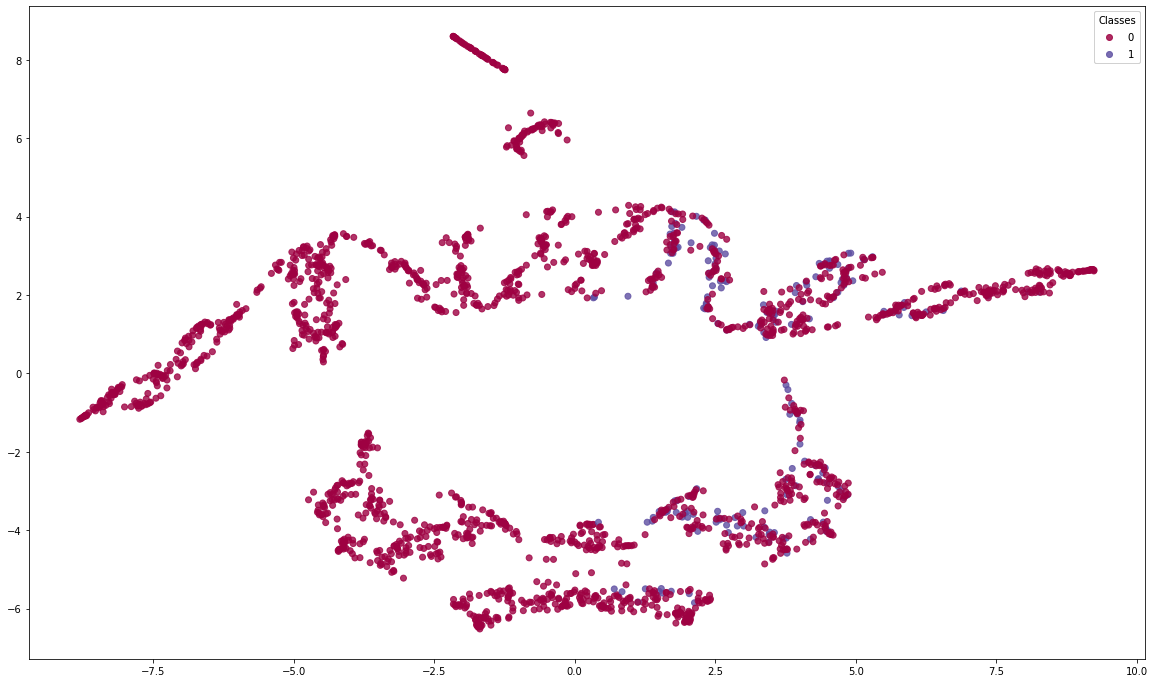

In [355]:
import matplotlib.cm as cm

rcParams['figure.figsize'] = 20, 12

N = 45
x, y = embedding[:, 0], embedding[:, 1]
c = labels


#s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, alpha=0.8, cmap=cm.Spectral)

legend1 = ax.legend(*scatter.legend_elements(), loc="best", title="Classes")
ax.add_artist(legend1)


plt.show()


# Model Selection (Still need to work)

## Functions

In [77]:
def train_test(features, labels):
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.05, random_state = 42)

    return train_features, test_features, train_labels, test_labels
    
            
def important_variables(clf, features):
    # Saving feature names for later use
    feature_list = list(features.columns)
    # Convert to numpy array
    
    # Get numerical feature importances
    importances = list(clf.feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    
    return feature_importances

def grid_search(model, train_features, train_labels, test_features):
    if model == 'GBR':
        model = GradientBoostingRegressor()
    elif model == 'RF':
        model = RandomForestRegressor()
        
    params = {'n_estimators' : [10,100,1000], 'max_depth' : [1,3,5,10,100], 'min_samples_leaf': [1,50,150,300]} 
    gs = GridSearchCV(model, params)
    gs.fit(train_features, train_labels)
    pred_tuned = gs.predict(test_features)
    
    print(gs.best_params_)
    return pred_tuned, gs


def performance_matric(test_labels, predictions, matric):
    if matric == 'mae':    
        mae = mean_absolute_error(test_labels, predictions)
        print("MAE: %.4f" % mae)
        
    else:
        print('Choose the right matric.')
    
    
def visualization(predictions_clf, test_labels):
    predictions_clf = pd.DataFrame(predictions_clf)
    predictions_clf.set_index(test_labels.index,inplace=True)

    comparison = pd.concat([test_labels, predictions_clf], axis=1, sort=True)
    comparison.rename(columns = {'time_to_failure': 'actual',  0:'prediction'}, inplace = True)

    
    comparison.plot
    # Plot the actual values
    plt.plot(comparison['actual'], 'b-', label = 'actual')
    # Plot the predicted values
    plt.plot(comparison['prediction'], 'ro', label = 'prediction')
    plt.xticks(rotation = '60'); 
    plt.legend()
    # Graph labels
    plt.xlabel('data'); plt.ylabel('Time to Failure'); plt.title('Actual and Predicted Values Gradient Boosting');


## Train Test Prep

In [78]:
features = training_data.drop('upset', axis= 1)
labels = training_data['upset']

scaler = MinMaxScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

#submission_features = test_data.drop('Pred', axis=1)

#scaler = MinMaxScaler()
#scaler.fit(submission_features)
#submission_features_scaled = scaler.transform(submission_features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_scaled, labels, test_size = 0.25, random_state = 42)

scaler = MinMaxScaler()
scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)

scaler = MinMaxScaler()
scaler.fit(test_features)
test_features_scaled = scaler.transform(test_features)

print('Training Features Shape:', train_features_scaled.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features_scaled.shape)
print('Testing Labels Shape:', test_labels.shape)

#print('Submission Features Shape:', submission_features_scaled.shape)


MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

Training Features Shape: (1561, 542)
Training Labels Shape: (1561,)
Testing Features Shape: (521, 542)
Testing Labels Shape: (521,)


In [63]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
#features = np.array(features)

## Modeling

### Baseline Model with Random Forest

In [64]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features_scaled, train_labels);

In [65]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features_scaled)

In [66]:
# Calculate the log loss
logloss = log_loss(test_labels, predictions_rf)
# Print out the mean absolute error (mae)
print('log_loss Error:', logloss)

log_loss Error: 9.992007221626413e-16


In [ ]:
rf = RandomForestRegressor()
params = {
    'n_estimators' : [10,100,1000],
    'max_depth' : [1,3,5,10,100],
    'min_samples_leaf': [1,50,150,300]
}
gs = GridSearchCV(rf, params)

In [ ]:
gs.fit(features_scaled, labels)

In [ ]:
gs.best_score_

In [199]:
preds = gs.best_estimator_.predict(submission_features_scaled)

ValueError: Number of features of the model must match the input. Model n_features is 539 and input n_features is 6 

In [ ]:
prediction_df = pd.DataFrame({'Pred':preds})

submission = submission_file[['ID','Pred']]
submission['Pred'] = prediction_df['Pred']

submission
submission.to_csv('submission_file_.csv', index=False)

In [ ]:
prediction_df['Pred'].hist()

### Gradient Boosting

In [189]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)

model = clf.fit(train_features, train_labels)
predictions_clf = clf.predict(test_features)
logloss = log_loss(test_labels, predictions_clf)
print("logloss: %.4f" % logloss)

logloss: 0.4162


In [190]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Seed_diff            Importance: 0.33
Variable: Team_Winrate         Importance: 0.27
Variable: Opp_Team_Winrate     Importance: 0.26
Variable: Seed_Number          Importance: 0.04
Variable: Opp_TeamID           Importance: 0.03
Variable: Opp_Seed_Number      Importance: 0.03
Variable: TeamID               Importance: 0.02
Variable: Season               Importance: 0.01
Variable: Seed_Group_W         Importance: 0.0
Variable: Seed_Group_X         Importance: 0.0
Variable: Seed_Group_Y         Importance: 0.0
Variable: Seed_Group_Z         Importance: 0.0
Variable: Opp_Seed_Group_W     Importance: 0.0
Variable: Opp_Seed_Group_X     Importance: 0.0
Variable: Opp_Seed_Group_Y     Importance: 0.0
Variable: Opp_Seed_Group_Z     Importance: 0.0


In [192]:
# New random forest with only the two most important variables
clf_most_important = GradientBoostingRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_features = [feature_importances[0][0], feature_importances[1][0], feature_importances[2][0], feature_importances[3][0]]

training_data_important = training_data[important_features]
features = training_data_important

scaler = MinMaxScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

# Split the data into training and testing sets
train_important, test_important, train_labels, test_labels = train_test_split(features_scaled, labels, test_size = 0.25, random_state = 42)


submission_features = test_data[important_features]
scaler = MinMaxScaler()
scaler.fit(submission_features)
submission_features_scaled = scaler.transform(submission_features)

# Train the random forest
clf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = clf_most_important.predict(test_important)
logloss = log_loss(test_labels, predictions)

# Display the performance metrics
print('Log Loss:', logloss)

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Log Loss: 0.5542903469999384


In [193]:
clf = GradientBoostingRegressor()
params = {
    'n_estimators' : [10,100,1000],
    'max_depth' : [1,3,5,10,100],
    'min_samples_leaf': [1,50,150,300]
}
gs_clf = GridSearchCV(clf, params)
gs_clf.fit(features, labels)
gs_clf.best_score_

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

0.07748280875816448

In [194]:
preds_clf = gs_clf.best_estimator_.predict(submission_features_scaled)

In [195]:
prediction_clf_df = pd.DataFrame({'Pred':preds_clf})
prediction_clf_df

submission_clf = submission_file[['ID','Pred']]
submission_clf['Pred'] = prediction_clf_df['Pred']

submission_clf
submission_clf.to_csv('submission_file_clf_.csv', index=False)

,Pred
0,0.438073
1,0.438073
2,0.438073
3,0.472664
4,-0.050813
...,...
11385,0.438073
11386,-0.038664
11387,0.963183
11388,0.963183


<ipython-input-195-6d69c9710c02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_clf['Pred'] = prediction_clf_df['Pred']


,ID,Pred
0,2015_1107_1112,0.438073
1,2015_1107_1116,0.438073
2,2015_1107_1124,0.438073
3,2015_1107_1125,0.472664
4,2015_1107_1129,-0.050813
...,...,...
11385,2019_1449_1459,0.438073
11386,2019_1449_1463,-0.038664
11387,2019_1458_1459,0.963183
11388,2019_1458_1463,0.963183


### Simple Neural Network (Not Started)

### Convolutional Neural Network

### Recurrent Neural Network

#### Reshape

In [176]:
train_features_scaled_reshaped = train_features.reshape(train_features.shape[0],1, train_features.shape[1])

test_features_scaled_reshaped = test_features.reshape(test_features.shape[0],1, test_features.shape[1])
print (f"shape of x_train_reshaped: {train_features_scaled_reshaped.shape}, \nshape of x_test_reshaped: {test_features_scaled_reshaped.shape}")

shape of x_train_reshaped: (1561, 1, 538), 
shape of x_test_reshaped: (521, 1, 538)


#### Build and Train the Model

In [177]:
n_timesteps, n_features, n_outputs = train_features_scaled_reshaped.shape[1], train_features_scaled_reshaped.shape[2], 1

##### First Model

In [181]:
# define model

def create_baseline():

    model_RNN = Sequential()
    model_RNN.add(SimpleRNN(286, activation='sigmoid', input_shape = (n_timesteps, n_features)))
    #model_RNN.add(Dropout(0.1))
    model_RNN.add(Dense(100, activation='sigmoid'))
    #model_RNN.add(Dropout(0.1))
    #model_RNN.add(Dense(50, activation='sigmoid'))
    model_RNN.add(Dense(n_outputs))

    model_RNN.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

    #model_RNN.summary()
    return model_RNN

In [186]:
model_RNN = Sequential()
model_RNN.add(SimpleRNN(286, activation='sigmoid', input_shape = (n_timesteps, n_features)))
#model_RNN.add(Dropout(0.1))
model_RNN.add(Dense(100, activation='sigmoid'))
#model_RNN.add(Dropout(0.1))
#model_RNN.add(Dense(50, activation='sigmoid'))
model_RNN.add(Dense(n_outputs))

model_RNN.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [182]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, train_features_scaled_reshaped, train_labels, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 10.03% (20.06%)


In [183]:
estimators = []
estimators.append(('standardize', MinMaxScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, train_features_scaled_reshaped, train_labels, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: nan% (nan%)


D:\Programming\Anaconda\envs\kaggle\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

  FitFailedWarning)
D:\Programming\Anaconda\envs\kaggle\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

  FitFailedWarning)
D:\Programming\Anaconda\envs\kaggle\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

  FitFailedWarning)
D:\Programming\Anaconda\envs\kaggle\lib\site-packages\sklearn

In [184]:
epochs = 700
batch_size = 72
verbose = 1
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [187]:
# fit network
history = model_RNN.fit(train_features_scaled_reshaped, train_labels, epochs=70, batch_size=batch_size, verbose=verbose, validation_split = 0.2, callbacks=callbacks)

Train on 1248 samples, validate on 313 samples
Epoch 1/70
1248/1248 [==============================] - 1s 560us/step - loss: 7.4692 - accuracy: 0.0665 - val_loss: 6.9486 - val_accuracy: 0.0000e+00
Epoch 2/70
1248/1248 [==============================] - ETA: 0s - loss: 7.9926 - accuracy: 0.0000e+ - 0s 69us/step - loss: 7.8855 - accuracy: 0.0000e+00 - val_loss: 6.9486 - val_accuracy: 0.0000e+00
Epoch 3/70
1248/1248 [==============================] - 0s 67us/step - loss: 7.8855 - accuracy: 0.0000e+00 - val_loss: 6.9486 - val_accuracy: 0.0000e+00


Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

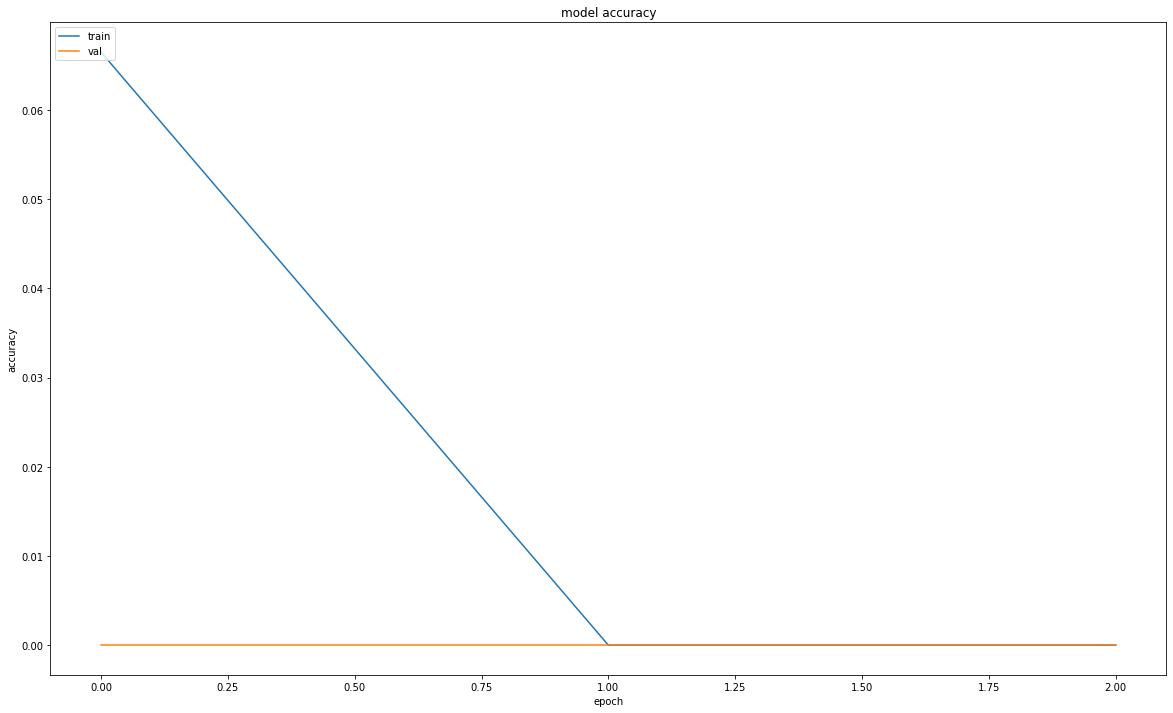

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

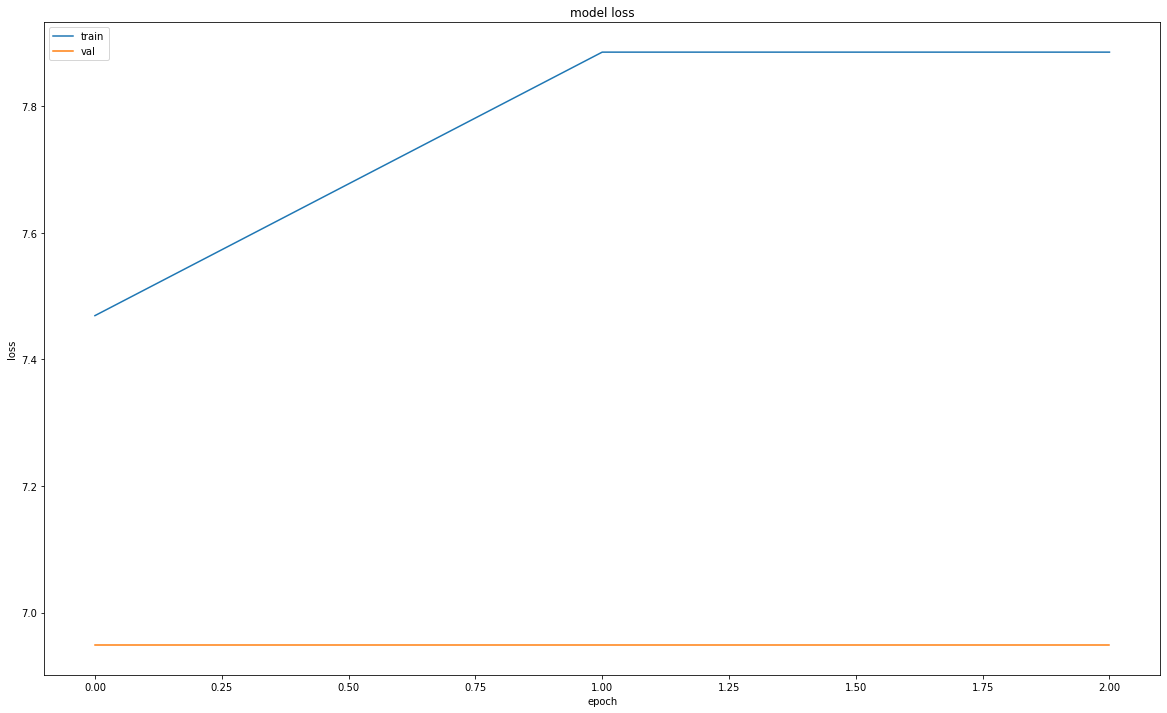

In [188]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [189]:
y_predict = model_RNN.predict(test_features_scaled_reshaped, verbose)

In [190]:
y_predict = y_predict.reshape(len(y_predict),)

new_df = pd.DataFrame({'actual':test_labels, 'prediction':y_predict})
#new_df.to_csv("E:\Data Science\Personal_Project\RNN - Solar Farm\Data\prediction_vs_actual.csv", index = False)
new_df

,actual,prediction
3645,0,-3.053110
1946,1,-3.070659
3793,0,-2.991613
1165,1,-3.065808
1668,1,-3.047490
...,...,...
3366,0,-3.031278
2017,1,-3.014815
3841,0,-3.033188
4104,0,-3.042076


Text(0.5, 1.0, 'prediction and actual comparison')

Text(0, 0.5, 'Solar Power')

Text(0.5, 0, 'datetime')

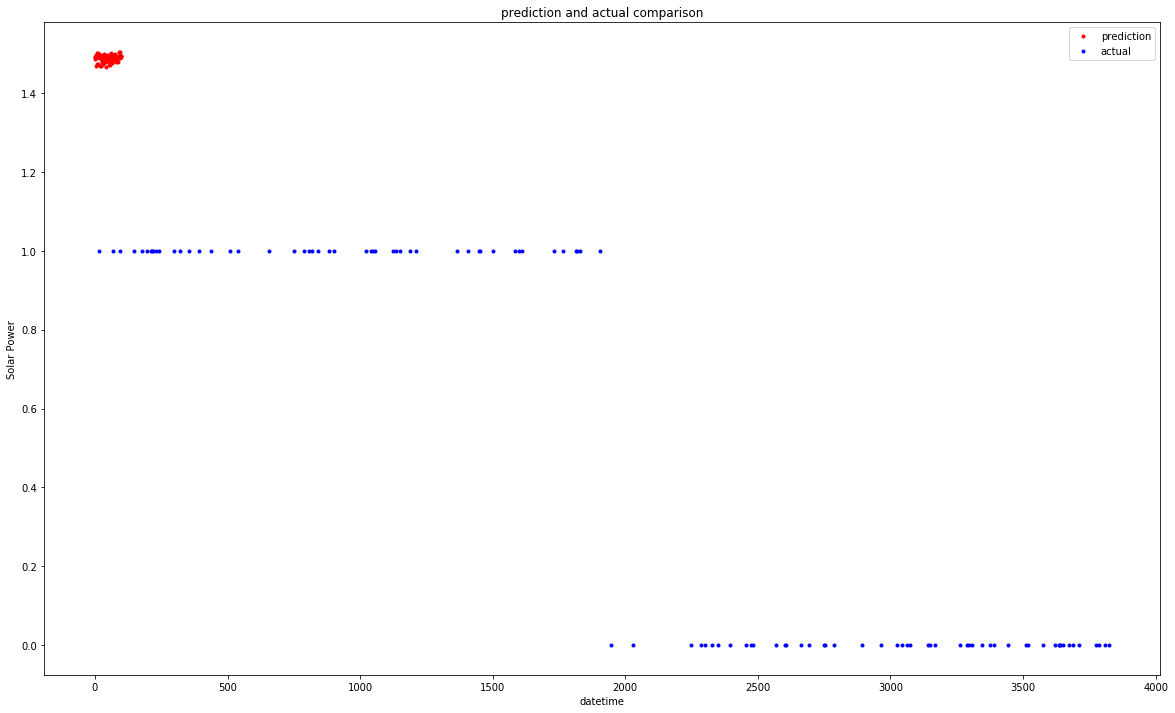

In [89]:
# summarize history for accuracy

#plt.figure(figsize=(50,10))
plt.plot(y_predict[:100],'r.')
plt.plot(test_labels[:100],'b.')

plt.title('prediction and actual comparison')
plt.ylabel('Solar Power')
plt.xlabel('datetime')
plt.legend(['prediction', 'actual'], loc='best')

plt.show()

# Submission

In [75]:
training_data.columns

Index(['Season', 'TeamID', 'Opp_TeamID', 'Pred', 'Seed_Number',
       'Opp_Seed_Number', 'Seed_diff', 'Seed_Group_W', 'Seed_Group_X',
       'Seed_Group_Y', 'Seed_Group_Z', 'Opp_Seed_Group_W', 'Opp_Seed_Group_X',
       'Opp_Seed_Group_Y', 'Opp_Seed_Group_Z', 'Team_Winrate',
       'Opp_Team_Winrate'],
      dtype='object')

In [83]:
prediction_df = pd.DataFrame({'Pred':preds})
prediction_df

submission = submission_file[['ID','Pred']]
submission['Pred'] = prediction_df['Pred']

submission
submission.to_csv('submission_file_clf_.csv', index=False)

,Pred
0,0.526280
1,0.526280
2,0.526280
3,0.346253
4,0.298346
...,...
11385,0.298346
11386,0.346253
11387,0.346253
11388,0.346253


<ipython-input-83-6df3d47d5303>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Pred'] = prediction_df['Pred']


,ID,Pred
0,2015_1107_1112,0.526280
1,2015_1107_1116,0.526280
2,2015_1107_1124,0.526280
3,2015_1107_1125,0.346253
4,2015_1107_1129,0.298346
...,...,...
11385,2019_1449_1459,0.298346
11386,2019_1449_1463,0.346253
11387,2019_1458_1459,0.346253
11388,2019_1458_1463,0.346253


# Reference
- Primary: [google-cloud-ncaa-march-madness-2020-division-1-mens-tournament](https://www.kaggle.com/c/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament)
- Secondary:

In [55]:
csv_path='https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')


Neighbourhoods = list(df.columns.values)
Neighbourhoods = Neighbourhoods[5:]


dfToronto = pd.DataFrame(index=Neighbourhoods, columns=["2016 Population","2016 Income"])

for index, row in dfToronto.iterrows():
    dfToronto.at[index, '2016 Population'] = df[index][2]
    dfToronto.at[index, '2016 Income'] = df[index][2264]

dfToronto['2016 Income'] = dfToronto['2016 Income'].str.replace(',', '').astype(int)
dfToronto['2016 Population'] = dfToronto['2016 Population'].str.replace(',', '').astype(int)


Data loaded


In [57]:
x = dfToronto.sort_values(by=["2016 Income"], ascending=False).head(10)
x

,2016 Population,2016 Income
Bridle Path-Sunnybrook-York Mills,9266,308010
Rosedale-Moore Park,20923,207903
Forest Hill South,10732,204521
Lawrence Park South,15179,169203
Casa Loma,10968,165047
Kingsway South,9271,144642
Leaside-Bennington,16828,125564
Bedford Park-Nortown,23236,123077
Yonge-St.Clair,12528,114174
Annex,30526,112766


In [58]:
x.sort_values(by=['2016 Population'], ascending=False, inplace=True)
x

,2016 Population,2016 Income
Annex,30526,112766
Bedford Park-Nortown,23236,123077
Rosedale-Moore Park,20923,207903
Leaside-Bennington,16828,125564
Lawrence Park South,15179,169203
Yonge-St.Clair,12528,114174
Casa Loma,10968,165047
Forest Hill South,10732,204521
Kingsway South,9271,144642
Bridle Path-Sunnybrook-York Mills,9266,308010
